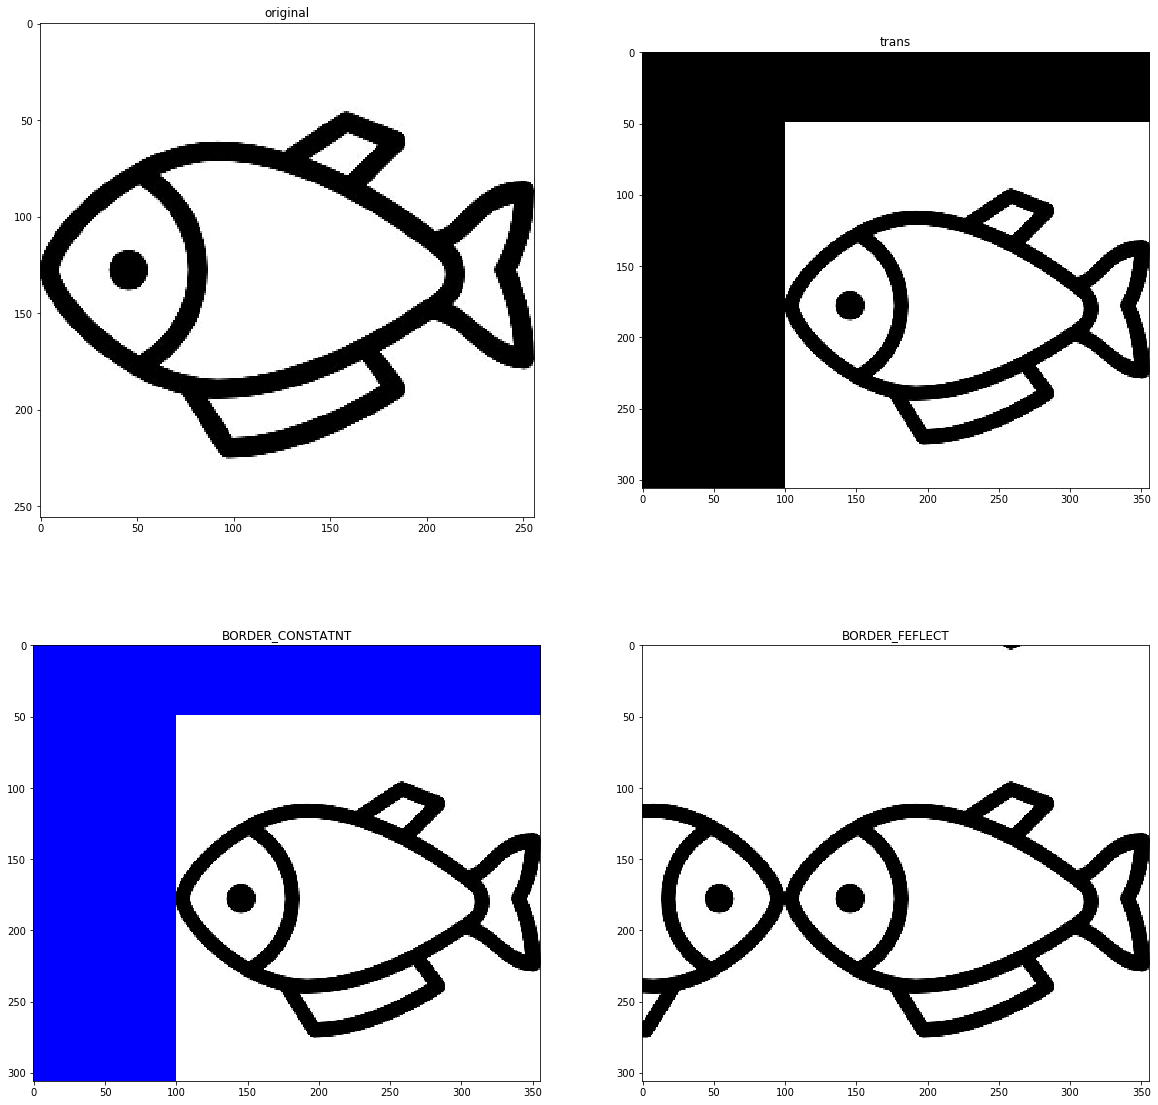

In [3]:
# matplot 빠르게 사용하기 위해 함수정의
import matplotlib.pylab as plt
def cv2tomat(img):
    b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
    img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
    return img2
import cv2
import numpy as np

img = cv2.imread('./img/fish.jpg')
rows,cols = img.shape[0:2]  # 영상의 크기

dx, dy = 100, 50            # 이동할 픽셀 거리

# ---① 변환 행렬 생성 
mtrx = np.float32([[1, 0, dx],
                   [0, 1, dy]])  
# ---② 단순 이동
dst = cv2.warpAffine(img, mtrx, (cols+dx, rows+dy))   

# ---③ 탈락된 외곽 픽셀을 파랑색으로 보정
dst2 = cv2.warpAffine(img, mtrx, (cols+dx, rows+dy), None, \
                        cv2.INTER_LINEAR, cv2.BORDER_CONSTANT, (255,0,0) )

# ---④ 탈락된 외곽 픽셀을 원본을 반사 시켜서 보정
dst3 = cv2.warpAffine(img, mtrx, (cols+dx, rows+dy), None, \
                                cv2.INTER_LINEAR, cv2.BORDER_REFLECT)

# cv2.imshow('original', img)
# cv2.imshow('trans',dst)
# cv2.imshow('BORDER_CONSTATNT', dst2)
# cv2.imshow('BORDER_FEFLECT', dst3)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


images = {'original':img,'trans':dst,'BORDER_CONSTATNT':dst2,'BORDER_FEFLECT':dst3 }
for i, (k, v) in enumerate(images.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(cv2tomat(v))
plt.rcParams["figure.figsize"] = (10,10)
plt.show()    


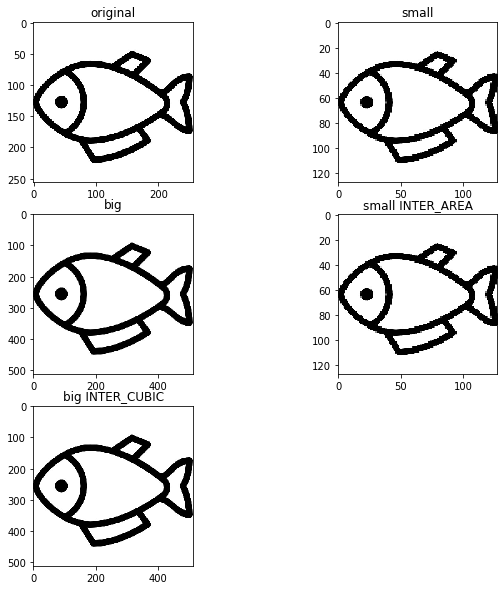

In [7]:
import cv2
import numpy as np

img = cv2.imread('./img/fish.jpg')
height, width = img.shape[:2]

# --① 0.5배 축소 변환 행렬
m_small = np.float32([[0.5, 0, 0],
                       [0, 0.5,0]])  
# --② 2배 확대 변환 행렬
m_big = np.float32([[2, 0, 0],
                     [0, 2, 0]])  

# --③ 보간법 적용 없이 확대 축소
dst1 = cv2.warpAffine(img, m_small, (int(height*0.5), int(width*0.5)))
dst2 = cv2.warpAffine(img, m_big, (int(height*2), int(width*2)))

# --④ 보간법 적용한 확대 축소
dst3 = cv2.warpAffine(img, m_small, (int(height*0.5), int(width*0.5)), \
                        None, cv2.INTER_AREA)
dst4 = cv2.warpAffine(img, m_big, (int(height*2), int(width*2)), \
                        None, cv2.INTER_CUBIC)

# 결과 출력
cv2.imshow("original", img)
cv2.imshow("small", dst1)
cv2.imshow("big", dst2)
cv2.imshow("small INTER_AREA", dst3)
cv2.imshow("big INTER_CUBIC", dst4)
cv2.waitKey(0)
cv2.destroyAllWindows()
# matplot 빠르게 사용하기 위해 함수정의
import matplotlib.pylab as plt
def cv2tomat(img):
    b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
    img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
    return img2
images = {'original':img,'small':dst1,'big':dst2,'small INTER_AREA':dst3,'big INTER_CUBIC':dst4 }
for i, (k, v) in enumerate(images.items()):
    plt.subplot(3,2,i+1)
    plt.title(k)
    plt.imshow(cv2tomat(v))
plt.rcParams["figure.figsize"] = (10,10)
plt.show()    


In [9]:
import cv2
import numpy as np

img = cv2.imread('./img/fish.jpg')
height, width = img.shape[:2]

#--① 크기 지정으로 축소
#dst1 = cv2.resize(img, (int(width*0.5), int(height*0.5)),\
#                        None, 0, 0, cv2.INTER_AREA)
dst1 = cv2.resize(img, (int(width*0.5), int(height*0.5)), \
                         interpolation=cv2.INTER_AREA)

#--② 배율 지정으로 확대
dst2 = cv2.resize(img, None,  None, 2, 2, cv2.INTER_CUBIC)
#--③ 결과 출력
cv2.imshow("original", img)
cv2.imshow("small", dst1)
cv2.imshow("big", dst2)
cv2.waitKey(0)
cv2.destroyAllWindows()

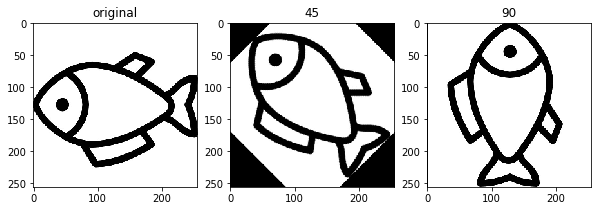

In [11]:
import cv2
import numpy as np

img = cv2.imread('./img/fish.jpg')
rows,cols = img.shape[0:2]

# ---① 라디안 각도 계산(60진법을 호도법으로 변경)
d45 = 45.0 * np.pi / 180    # 45도
d90 = 90.0 * np.pi / 180    # 90도

# ---② 회전을 위한 변환 행렬 생성
m45 = np.float32( [[ np.cos(d45), -1* np.sin(d45), rows//2],
                    [np.sin(d45), np.cos(d45), -1*cols//4]])
m90 = np.float32( [[ np.cos(d90), -1* np.sin(d90), rows],
                    [np.sin(d90), np.cos(d90), 0]])

# ---③ 회전 변환 행렬 적용
r45 = cv2.warpAffine(img,m45,(cols,rows))
r90 = cv2.warpAffine(img,m90,(rows,cols))

# ---④ 결과 출력
# cv2.imshow("origin", img)
# cv2.imshow("45", r45)
# cv2.imshow("90", r90)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# matplot 빠르게 사용하기 위해 함수정의
import matplotlib.pylab as plt
def cv2tomat(img):
    b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
    img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
    return img2
images = {'original':img,'45':r45,'90':r90}
for i, (k, v) in enumerate(images.items()):
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.imshow(cv2tomat(v))
plt.rcParams["figure.figsize"] = (10,10)
plt.show()    


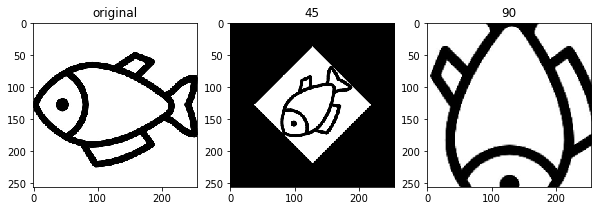

In [13]:
import cv2

img = cv2.imread('./img/fish.jpg')
rows,cols = img.shape[0:2]

#---① 회전을 위한 변환 행렬 구하기
# 회전축:중앙, 각도:45, 배율:0.5
m45 = cv2.getRotationMatrix2D((cols/2,rows/2),45,0.5) 
# 회전축:중앙, 각도:90, 배율:1.5
m90 = cv2.getRotationMatrix2D((cols/2,rows/2),90,1.5) 

#---② 변환 행렬 적용
img45 = cv2.warpAffine(img, m45,(cols, rows))
img90 = cv2.warpAffine(img, m90,(cols, rows))

#---③ 결과 출력
# cv2.imshow('origin',img)
# cv2.imshow("45", img45)
# cv2.imshow("90", img90)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# matplot 빠르게 사용하기 위해 함수정의
import matplotlib.pylab as plt
def cv2tomat(img):
    b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
    img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
    return img2
images = {'original':img,'45':img45,'90':img90}
for i, (k, v) in enumerate(images.items()):
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.imshow(cv2tomat(v))
plt.rcParams["figure.figsize"] = (10,10)
plt.show()    


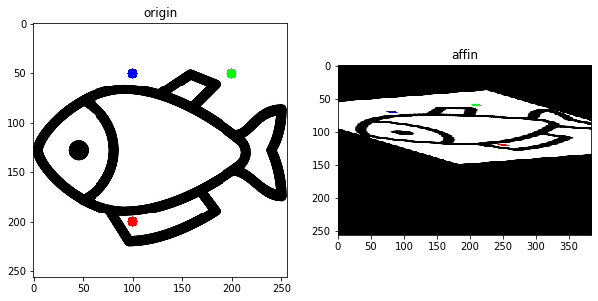

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

file_name = './img/fish.jpg'
img = cv2.imread(file_name)
rows, cols = img.shape[:2]

# ---① 변환 전, 후 각 3개의 좌표 생성
pts1 = np.float32([[100, 50], [200, 50], [100, 200]])
pts2 = np.float32([[80, 70], [210, 60], [250, 120]])

# ---② 변환 전 좌표를 이미지에 표시
cv2.circle(img, (100,50), 5, (255,0), -1)
cv2.circle(img, (200,50), 5, (0,255,0), -1)
cv2.circle(img, (100,200), 5, (0,0,255), -1)

#---③ 짝지은 3개의 좌표로 변환 행렬 계산
mtrx = cv2.getAffineTransform(pts1, pts2)
#---④ 어핀 변환 적용
dst = cv2.warpAffine(img, mtrx, (int(cols*1.5), rows))

#---⑤ 결과 출력
# cv2.imshow('origin',img)
# cv2.imshow('affin', dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
from matplotlib import pyplot as plt
def cv2tomat(img):
    b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
    img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
    return img2
images = {'origin':img,'affin':dst}
for i, (k, v) in enumerate(images.items()):
    plt.subplot(1,2,i+1)
    plt.title(k)
    plt.imshow(cv2tomat(v))
plt.rcParams["figure.figsize"] = (10,10)
plt.show()   

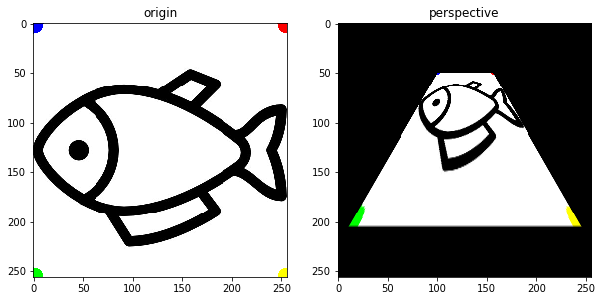

In [3]:
import cv2
import numpy as np

file_name = "./img/fish.jpg"
img = cv2.imread(file_name)
rows, cols = img.shape[:2]

#---① 원근 변환 전 후 4개 좌표
pts1 = np.float32([[0,0], [0,rows], [cols, 0], [cols,rows]])
pts2 = np.float32([[100,50], [10,rows-50], [cols-100, 50], [cols-10,rows-50]])

#---② 변환 전 좌표를 원본 이미지에 표시
cv2.circle(img, (0,0), 10, (255,0,0), -1)
cv2.circle(img, (0,rows), 10, (0,255,0), -1)
cv2.circle(img, (cols,0), 10, (0,0,255), -1)
cv2.circle(img, (cols,rows), 10, (0,255,255), -1)

#---③ 원근 변환 행렬 계산
mtrx = cv2.getPerspectiveTransform(pts1, pts2)
#---④ 원근 변환 적용
dst = cv2.warpPerspective(img, mtrx, (cols, rows))

# cv2.imshow("origin", img)
# cv2.imshow('perspective', dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

from matplotlib import pyplot as plt
def cv2tomat(img):
    b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
    img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
    return img2
images = {'origin':img,'perspective':dst}
for i, (k, v) in enumerate(images.items()):
    plt.subplot(1,2,i+1)
    plt.title(k)
    plt.imshow(cv2tomat(v))
plt.rcParams["figure.figsize"] = (10,10)
plt.show()   

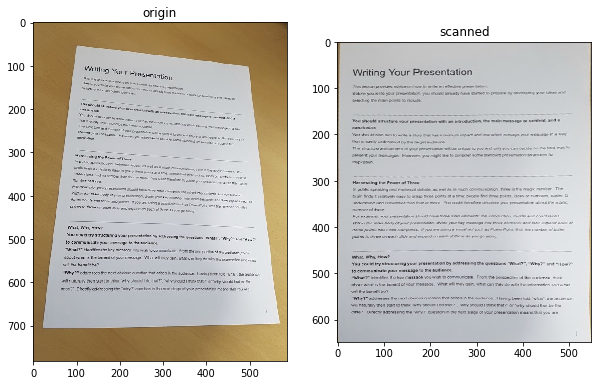

In [13]:
import cv2
import numpy as np

from matplotlib import pyplot as plt
def cv2tomat(img):
    b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
    img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
    return img2

win_name = "scanning"
img = cv2.imread("./img/paper.jpg")
rows, cols = img.shape[:2]
draw = img.copy()
pts_cnt = 0
pts = np.zeros((4,2), dtype=np.float32)

def onMouse(event, x, y, flags, param):  #마우스 이벤트 콜백 함수 구현 ---① 
    global  pts_cnt                     # 마우스로 찍은 좌표의 갯수 저장
    if event == cv2.EVENT_LBUTTONDOWN:  
        cv2.circle(draw, (x,y), 10, (0,255,0), -1) # 좌표에 초록색 동그라미 표시
        cv2.imshow(win_name, draw)

        pts[pts_cnt] = [x,y]            # 마우스 좌표 저장
        pts_cnt+=1
        if pts_cnt == 4:                       # 좌표가 4개 수집됨 
            # 좌표 4개 중 상하좌우 찾기 ---② 
            sm = pts.sum(axis=1)                 # 4쌍의 좌표 각각 x+y 계산
            diff = np.diff(pts, axis = 1)       # 4쌍의 좌표 각각 x-y 계산

            topLeft = pts[np.argmin(sm)]         # x+y가 가장 값이 좌상단 좌표
            bottomRight = pts[np.argmax(sm)]     # x+y가 가장 큰 값이 좌상단 좌표
            topRight = pts[np.argmin(diff)]     # x-y가 가장 작은 것이 우상단 좌표
            bottomLeft = pts[np.argmax(diff)]   # x-y가 가장 큰 값이 좌하단 좌표

            # 변환 전 4개 좌표 
            pts1 = np.float32([topLeft, topRight, bottomRight , bottomLeft])

            # 변환 후 영상에 사용할 서류의 폭과 높이 계산 ---③ 
            w1 = abs(bottomRight[0] - bottomLeft[0])    # 상단 좌우 좌표간의 거리
            w2 = abs(topRight[0] - topLeft[0])          # 하당 좌우 좌표간의 거리
            h1 = abs(topRight[1] - bottomRight[1])      # 우측 상하 좌표간의 거리
            h2 = abs(topLeft[1] - bottomLeft[1])        # 좌측 상하 좌표간의 거리
            width = max([w1, w2])                       # 두 좌우 거리간의 최대값이 서류의 폭
            height = max([h1, h2])                      # 두 상하 거리간의 최대값이 서류의 높이
            
            # 변환 후 4개 좌표
            pts2 = np.float32([[0,0], [width-1,0], 
                                [width-1,height-1], [0,height-1]])

            # 변환 행렬 계산 
            mtrx = cv2.getPerspectiveTransform(pts1, pts2)
            # 원근 변환 적용
            result = cv2.warpPerspective(img, mtrx, (width, height))
            cv2.imshow('scanned', result)
            images = {'origin':img,'scanned':result}
            for i, (k, v) in enumerate(images.items()):
                plt.subplot(1,2,i+1)
                plt.title(k)
                plt.imshow(cv2tomat(v))
            plt.rcParams["figure.figsize"] = (10,10)
            plt.show()
        
            
cv2.imshow(win_name, img)
cv2.setMouseCallback(win_name, onMouse)    # 마우스 콜백 함수를 GUI 윈도우에 등록 ---④
cv2.waitKey(0)
cv2.destroyAllWindows()



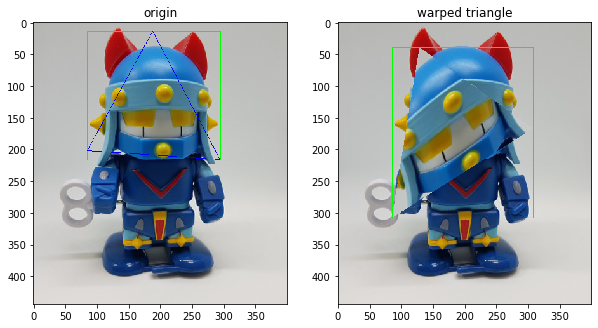

In [15]:
import cv2
import numpy as np

img = cv2.imread("./img/taekwonv1.jpg")
img2 = img.copy()
draw = img.copy()

# 변환 전,후 삼각형 좌표 ---①
pts1 = np.float32([[188,14], [85,202], [294,216]])
pts2 = np.float32([[128,40], [85,307], [306,167]])

# 각 삼각형을 완전히 감싸는 사각형 좌표 구하기 ---②
x1,y1,w1,h1 = cv2.boundingRect(pts1)
x2,y2,w2,h2 = cv2.boundingRect(pts2)

# 사각형을 이용한 관심영역 설정 ---③
roi1 = img[y1:y1+h1, x1:x1+w1]
roi2 = img2[y2:y2+h2, x2:x2+w2]

# 관심영역을 기준으로 좌표 계산 ---④
offset1 = np.zeros((3,2), dtype=np.float32)
offset2 = np.zeros((3,2), dtype=np.float32)
for i in range(3):
    offset1[i][0], offset1[i][1] = pts1[i][0]-x1, pts1[i][1]-y1
    offset2[i][0], offset2[i][1] = pts2[i][0]-x2, pts2[i][1]-y2

# 관심 영역을 주어진 삼각형 좌표로 어핀 변환 ---⑤
mtrx = cv2.getAffineTransform(offset1, offset2)
warped = cv2.warpAffine( roi1, mtrx, (w2, h2), None, \
                        cv2.INTER_LINEAR, cv2.BORDER_REFLECT_101)

# 어핀 변환 후 삼각형만 골라 내기 위한 마스크 생성 ---⑥
mask = np.zeros((h2, w2), dtype = np.uint8)
cv2.fillConvexPoly(mask, np.int32(offset2), (255))

# 삼각형 영역만 마스킹해서 합성 ---⑦
warped_masked = cv2.bitwise_and(warped, warped, mask=mask)
roi2_masked = cv2.bitwise_and(roi2, roi2, mask=cv2.bitwise_not(mask))
roi2_masked = roi2_masked + warped_masked
img2[y2:y2+h2, x2:x2+w2] = roi2_masked

# 관심 영역과 삼각형에 선 그려서 출력 ---⑧
cv2.rectangle(draw, (x1, y1), (x1+w1, y1+h1), (0,255,0), 1)
cv2.polylines(draw, [pts1.astype(np.int32)], True, (255,0,0), 1)
cv2.rectangle(img2, (x2, y2), (x2+w2, y2+h2), (0,255,0), 1)
# cv2.imshow('origin', draw)
# cv2.imshow('warped triangle', img2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


from matplotlib import pyplot as plt
def cv2tomat(img):
    b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
    img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
    return img2
images = {'origin':draw,'warped triangle':img2}
for i, (k, v) in enumerate(images.items()):
    plt.subplot(1,2,i+1)
    plt.title(k)
    plt.imshow(cv2tomat(v))
plt.rcParams["figure.figsize"] = (10,10)
plt.show()   


matrix: 0.0019981861114501953
remap: 0.002001047134399414


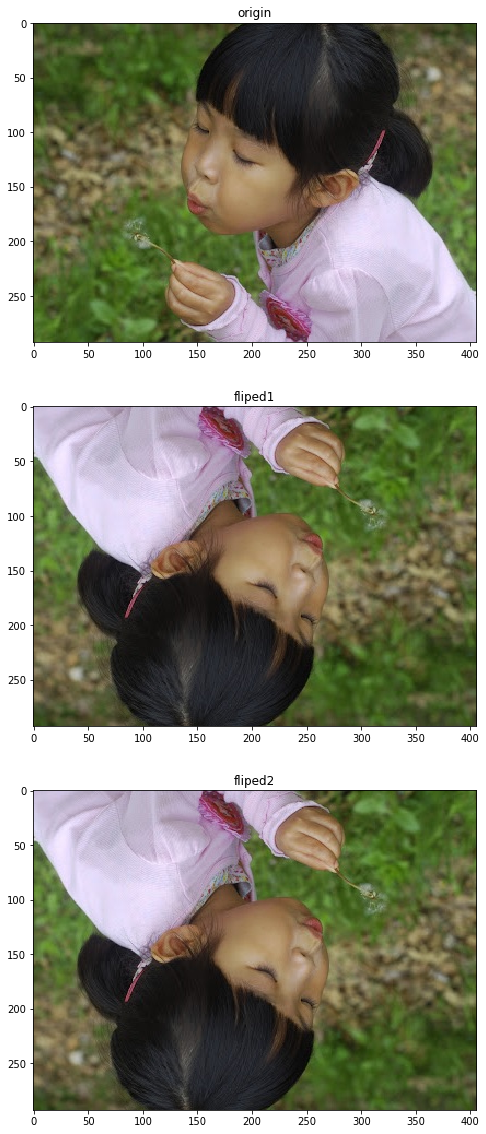

In [5]:
import cv2
import numpy as np
import time

img = cv2.imread('./img/girl.jpg')
rows, cols = img.shape[:2]

# 뒤집기 변환 행렬로 구현 ---①
st = time.time()
mflip = np.float32([ [-1, 0, cols-1],[0, -1, rows-1]]) # 변환 행렬 생성
fliped1 = cv2.warpAffine(img, mflip, (cols, rows))     # 변환 적용
print('matrix:', time.time()-st)

# remap 함수로 뒤집기 구현 ---②
st2 = time.time()
mapy, mapx = np.indices((rows, cols),dtype=np.float32) # 매핑 배열 초기화 생성
mapx = cols - mapx -1                                  # x축 좌표 뒤집기 연산
mapy = rows - mapy -1                                  # y축 좌표 뒤집기 연산
fliped2 = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)  # remap 적용
print('remap:', time.time()-st2)

# 결과 출력 ---③
# cv2.imshow('origin', img)
# cv2.imshow('fliped1',fliped1)
# cv2.imshow('fliped2',fliped2)
# cv2.waitKey()
# cv2.destroyAllWindows()

from matplotlib import pyplot as plt
def cv2tomat(img):
    b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
    img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
    return img2
images = {'origin':img,'fliped1':fliped1,'fliped2':fliped2}
for i, (k, v) in enumerate(images.items()):
    plt.subplot(len(images),1,i+1)
    plt.title(k)
    plt.imshow(cv2tomat(v))
# plt.rcParams["figure.figsize"] = (30,30)
plt.show()   


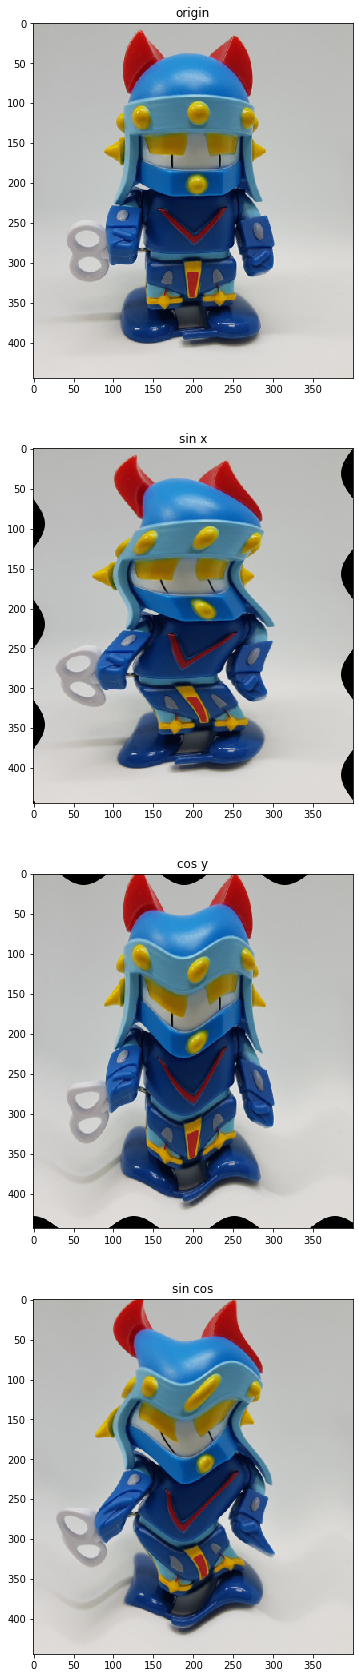

In [6]:
import cv2
import numpy as np

l = 20      # 파장(wave length)
amp = 15    # 진폭(amplitude)

img = cv2.imread('./img/taekwonv1.jpg')
rows, cols = img.shape[:2]

# 초기 매핑 배열 생성 ---①
mapy, mapx = np.indices((rows, cols),dtype=np.float32)

# sin, cos 함수를 적용한 변형 매핑 연산 ---②
sinx = mapx + amp * np.sin(mapy/l)  
cosy = mapy + amp * np.cos(mapx/l)

# 영상 매핑 ---③

img_sinx=cv2.remap(img, sinx, mapy, cv2.INTER_LINEAR) # x축만 sin 곡선 적용
img_cosy=cv2.remap(img, mapx, cosy, cv2.INTER_LINEAR) # y축만 cos 곡선 적용
# x,y 축 모두 sin, cos 곡선 적용 및 외곽 영역 보정
img_both=cv2.remap(img, sinx, cosy, cv2.INTER_LINEAR, \
                    None, cv2.BORDER_REPLICATE)
# 결과 출력 
# cv2.imshow('origin', img)
# cv2.imshow('sin x', img_sinx)
# cv2.imshow('cos y', img_cosy)
# cv2.imshow('sin cos', img_both)

# cv2.waitKey()
# cv2.destroyAllWindows()

from matplotlib import pyplot as plt
def cv2tomat(img):
    b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
    img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
    return img2
images = {'origin':img,'sin x':img_sinx,'cos y':img_cosy,'sin cos':img_both}
for i, (k, v) in enumerate(images.items()):
    plt.subplot(len(images),1,i+1)
    plt.title(k)
    plt.imshow(cv2tomat(v))
# plt.rcParams["figure.figsize"] = (30,30)
plt.show()   


(444, 400, 3)


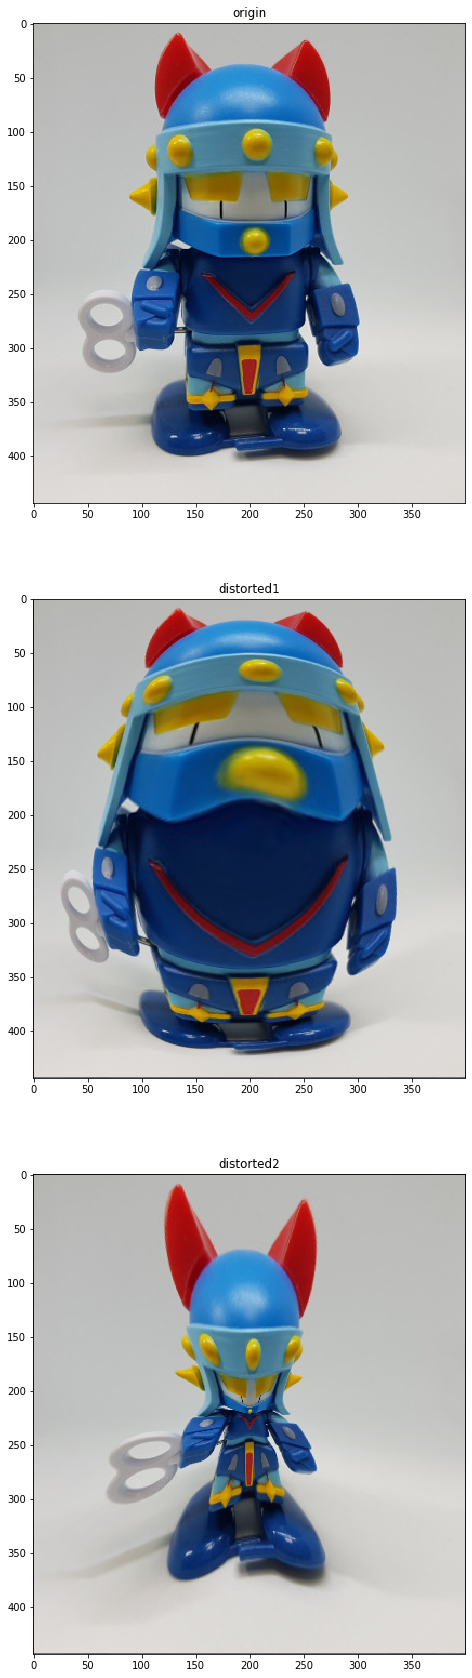

In [13]:
import cv2
import numpy as np

# ---① 설정 값 셋팅
exp = 2       # 볼록, 오목 지수 (오목 : 0.1 ~ 1, 볼록 : 1.1~)
exp2 = 0.5
scale = 1           # 변환 영역 크기 (0 ~ 1)


img = cv2.imread('./img/taekwonv1.jpg')
print(img.shape)

# 두가지 결과물과 원본을 함께 보기위해 함수화
def distorte(img,exp,scale):
    rows, cols = img.shape[:2]
    # 매핑 배열 생성 ---②
    mapy, mapx = np.indices((rows, cols),dtype=np.float32)

    # 좌상단 기준좌표에서 -1~1로 정규화된 중심점 기준 좌표로 변경 ---③
    mapx = 2*mapx/(cols-1)-1
    mapy = 2*mapy/(rows-1)-1

    # 직교좌표를 극 좌표로 변환 ---④
    r, theta = cv2.cartToPolar(mapx, mapy)

    # 왜곡 영역만 중심확대/축소 지수 적용 ---⑤
    r[r< scale] = r[r<scale] **exp  

    # 극 좌표를 직교좌표로 변환 ---⑥
    mapx, mapy = cv2.polarToCart(r, theta)

    # 중심점 기준에서 좌상단 기준으로 변경 ---⑦
    mapx = ((mapx + 1)*cols-1)/2
    mapy = ((mapy + 1)*rows-1)/2
    # 재매핑 변환
    distorted = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)
    return distorted
# cv2.imshow('origin', img)
# cv2.imshow('distorted', distorted)
# cv2.waitKey()
# cv2.destroyAllWindows()

distorted1=distorte(img,exp,scale) #볼록
distorted2=distorte(img,exp2,scale) #오목

from matplotlib import pyplot as plt
def cv2tomat(img):
    b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
    img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
    return img2
images = {'origin':img,'distorted1':distorted1,'distorted2':distorted2}
for i, (k, v) in enumerate(images.items()):
    plt.subplot(len(images),1,i+1)
    plt.title(k)
    plt.imshow(cv2tomat(v))
# plt.rcParams["figure.figsize"] = (30,30)
plt.show()   


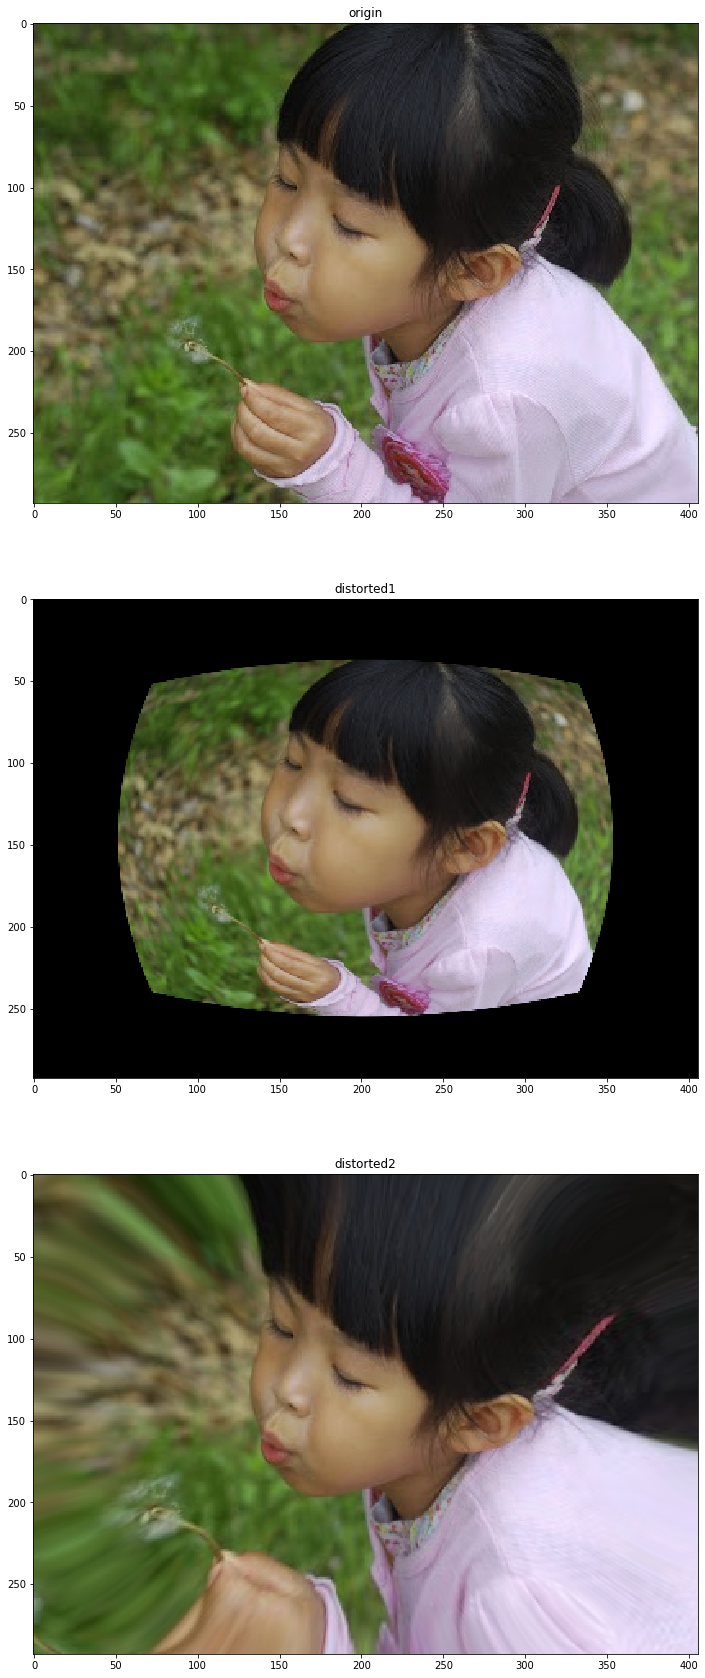

In [17]:
import cv2
import numpy as np

# 왜곡 계수 설정 ---①
#k1, k2, k3 = 0.5, 0.2, 0.0 # 배럴 왜곡
#k1, k2, k3 = -0.3, 0, 0    # 핀큐션 왜곡

img = cv2.imread('./img/girl.jpg')
#왜곡과정 함수화
def barrel_pin(img,k1,k2,k3):
    rows, cols = img.shape[:2]

    # 매핑 배열 생성 ---②
    mapy, mapx = np.indices((rows, cols),dtype=np.float32)

    # 중앙점 좌표로 -1~1 정규화 및 극좌표 변환 ---③
    mapx = 2*mapx/(cols-1)-1
    mapy = 2*mapy/(rows-1)-1
    r, theta = cv2.cartToPolar(mapx, mapy)

    # 방사 왜곡 변영 연산 ---④
    ru = r*(1+k1*(r**2) + k2*(r**4) + k3*(r**6)) 

    # 직교좌표 및 좌상단 기준으로 복원 ---⑤
    mapx, mapy = cv2.polarToCart(ru, theta)
    mapx = ((mapx + 1)*cols-1)/2
    mapy = ((mapy + 1)*rows-1)/2
    # 리매핑 ---⑥
    distored = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)
    return distored

distored1=barrel_pin(img,0.5,0.2,0.0)
distored2=barrel_pin(img,-0.3,0,0)

from matplotlib import pyplot as plt
def cv2tomat(img):
    b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
    img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
    return img2
images = {'origin':img,'distorted1':distored1,'distorted2':distored2}
for i, (k, v) in enumerate(images.items()):
    plt.subplot(len(images),1,i+1)
    plt.title(k)
    plt.imshow(cv2tomat(v))
# plt.rcParams["figure.figsize"] = (30,30)
plt.show()   

# cv2.imshow('original', img)
# cv2.imshow('distorted', distored)
# cv2.waitKey()
# cv2.destroyAllWindows()

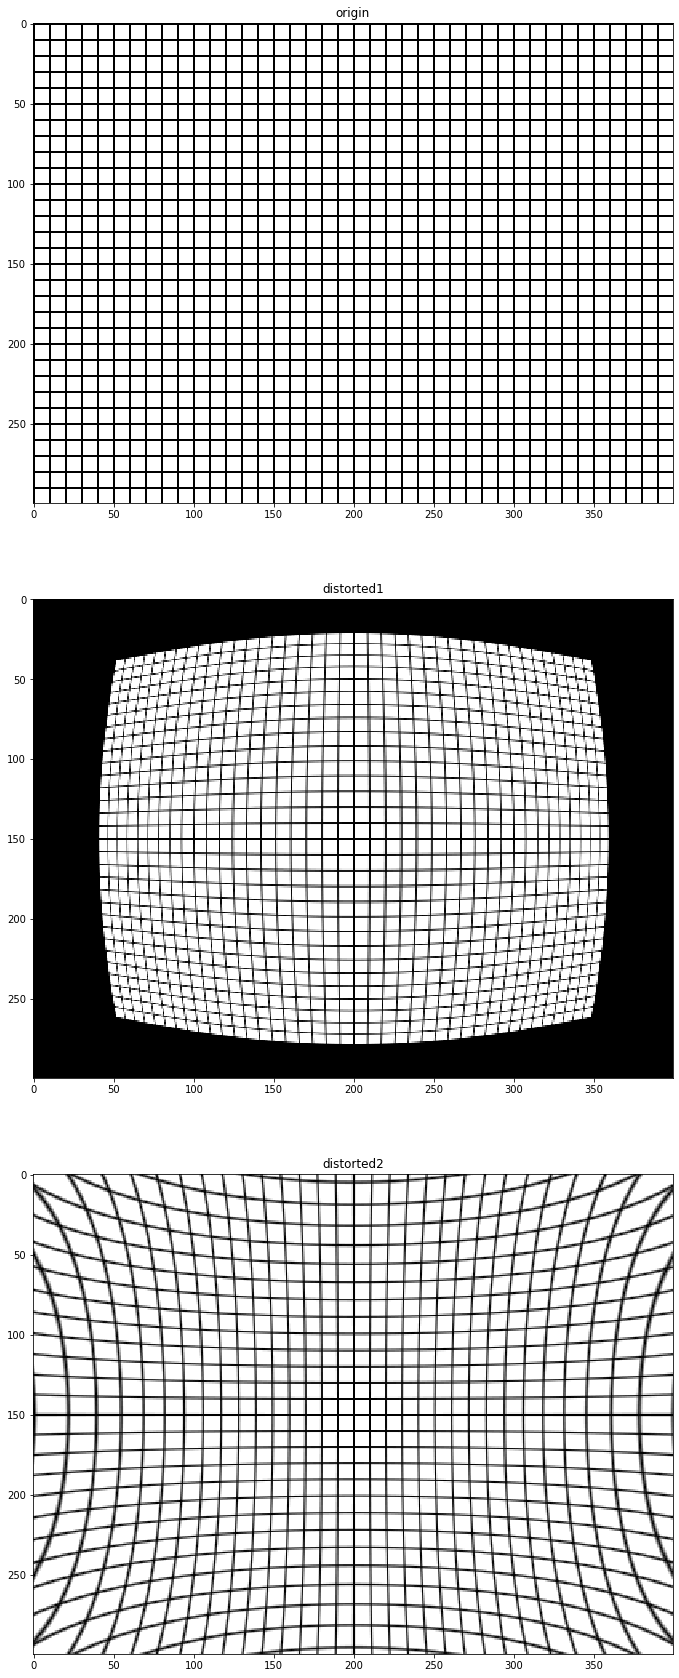

In [19]:
import numpy as np
import cv2

# 격자 무늬 영상 생성 ---①
img = np.full((300,400,3), 255, np.uint8)
img[::10, :, :] = 0
img[:, ::10, :] = 0
width  = img.shape[1]
height = img.shape[0]

# 왜곡 계수 설정 ---②
#k1, k2, p1, p2 = 0.001, 0, 0, 0     # 배럴 왜곡
barrel=[0.001, 0, 0, 0]
#k1, k2, p1, p2 = -0.0005, 0, 0, 0  # 핀쿠션 왜곡
pin=[-0.0005, 0, 0, 0]
distCoeff1 = np.float64(barrel)
distCoeff2 = np.float64(pin)
# 임의의 값으로 카메라 매트릭스 설정 ---③
fx, fy = 10, 10
cx, cy = width/2, height/2
camMtx = np.float32([[fx,0, cx],
                     [0, fy, cy],
                     [0 ,0 ,1]])

# 왜곡 변형 ---④
dst1 = cv2.undistort(img,camMtx,distCoeff1)
dst2 = cv2.undistort(img,camMtx,distCoeff2)

from matplotlib import pyplot as plt
def cv2tomat(img):
    b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
    img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
    return img2
images = {'origin':img,'distorted1':dst1,'distorted2':dst2}
for i, (k, v) in enumerate(images.items()):
    plt.subplot(len(images),1,i+1)
    plt.title(k)
    plt.imshow(cv2tomat(v))
# plt.rcParams["figure.figsize"] = (30,30)
plt.show()   


# cv2.imshow('original', img)
# cv2.imshow('dst',dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()